In [1]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
from stephenHeadConfig import conf as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Creating val data /groups/branson/bransonlab/mayank/PoseTF/cacheHead/valdata!
Done 0 of 127 movies, count:0 val:3
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:5 val:3
Done 3 of 127 movies, count:6 val:3
Done 4 of 127 movies, count:6 val:3
Done 5 of 127 movies, count:8 val:3
Done 6 of 127 movies, count:8 val:6
Done 7 of 127 movies, count:8 val:9
Done 8 of 127 movies, count:8 val:9
Done 9 of 127 movies, count:8 val:9
Done 10 of 127 movies, count:11 val:9
Done 11 of 127 movies, count:14 val:9
Done 12 of 127 movies, count:17 val:9
Done 13 of 127 movies, count:17 val:9
Done 14 of 127 movies, count:17 val:9
Done 15 of 127 movies, count:20 val:9
Done 16 of 127 movies, count:22 val:9
Done 17 of 127 movies, count:22 val:12
Done 18 of 127 movies, count:22 val:12
Done 19 of 127 movies, count:22 val:12
Done 20 of 127 movies, count:25 val:12
Done 21 of 127 movies, count:28 val:12
Done 22 of 127 movies, count:30 val:12
Done 23 of 127 movies, count:32 val:12
Done 24 of 127 movies, 

In [6]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py
from stephenHeadConfig import sideconf as conf


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 127 movies, count:3 val:0
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:3 val:5
Done 3 of 127 movies, count:4 val:5
Done 4 of 127 movies, count:4 val:5
Done 5 of 127 movies, count:6 val:5
Done 6 of 127 movies, count:9 val:5
Done 7 of 127 movies, count:12 val:5
Done 8 of 127 movies, count:12 val:5
Done 9 of 127 movies, count:12 val:5
Done 10 of 127 movies, count:15 val:5
Done 11 of 127 movies, count:18 val:5
Done 12 of 127 movies, count:18 val:8
Done 13 of 127 movies, count:18 val:8
Done 14 of 127 movies, count:18 val:8
Done 15 of 127 movies, count:21 val:8
Done 16 of 127 movies, count:21 val:10
Done 17 of 127 movies, count:24 val:10
Done 18 of 127 movies, count:24 val:10
Done 19 of 127 movies, count:24 val:10
Done 20 of 127 movies, count:24 val:13
Done 21 of 127 movies, count:24 val:16
Done 22 of 127 movies, count:26 val:16
Done 23 of 127 movies, count:28 val:16
Done 24 of 127 movies, count:28 val:16
Done 25 of 127 movies, count:31 val:16
Done 26 of 127 movi

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
# convert from dropbox to the newer location
import pickle
with open('cacheHead/valdata_dropbox','rb') as f:
    isval,localdirs,seldirs = pickle.load(f)
localdirs[0][35:]
ll = ['/home/mayank/work/PoseEstimationData' + x[35:] for x in localdirs]
ll[0]
with open('cacheHead/valdata','wb') as f:
    pickle.dump([isval,ll,seldirs],f)

In [18]:
_,valmovies = multiResData.getMovieLists(conf)
print valmovies[0]
print valmovies[3]

/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0019/fly_0019_trial_002/C001H001S0001/C001H001S0001.avi
/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_002/C001H001S0001/C001H001S0001.avi


In [2]:
# copy the validation file from front view to side view
import pickle
import os
import re

from stephenHeadConfig import conf
conforig = conf
from stephenHeadConfig import sideconf as conf
outfile = os.path.join(conforig.cachedir,conforig.valdatafilename)
assert os.path.isfile(outfile),"valdatafile doesn't exist"

with open(outfile,'r') as f:
    isval,localdirs,seldirs = pickle.load(f)

newdirs = []    
for ndx,l in enumerate(localdirs):
    if ndx == 19:
        newdirs.append('/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_005/C001H001S0002/C001H001S0002.avi')
    else:
        newdirs.append(re.sub('C002','C001',l,count = 3))
#     print('%d %d:%s' % (ndx,os.path.isfile(newdirs[-1]),newdirs[-1]))

outfile = os.path.join(conf.cachedir,conf.valdatafilename)

with open(outfile,'w') as f:
    pickle.dump([isval,newdirs,seldirs],f)
    

In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf

pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128


In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf
import tensorflow as tf

tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=False)

Not loading base variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 54528.270,156.8, Val = 54223.758,158.9
Saved state to /home/mayank/work/poseEstimation/cacheHead/headBase-0
Iter 30, Train = 721.415,171.9, Val = 745.655,156.4
Iter 60, Train = 295.271,105.4, Val = 283.500,87.6
Iter 90, Train = 273.081,110.0, Val = 273.678,90.5
Iter 120, Train = 272.722,85.8, Val = 273.241,86.1
Iter 150, Train = 270.390,80.2, Val = 268.109,65.7
Iter 180, Train = 272.099,62.6, Val = 268.132,61.6
Iter 210, Train = 264.053,56.9, Val = 269.716,58.7
Iter 240, Train = 262.945,60.8, Val = 264.539,57.1
Iter 270, Train = 263.840,59.0, Val = 264.822,55.7
Iter 300, Train = 257.634,62.9, Val = 257.450,53.5
Iter 330, Train = 250.741,53.2, Val = 252.118,51.6
Iter 360, Train = 238.766,32.0, Val = 248.108,47.4
Iter 390, Train = 234.208,43.8, Val = 236.280,37.8
Iter 420, Train = 220.239,35.5, Val = 221.915,30.0
Iter 450, Train = 213.150,33.2, Val = 216.8

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
device doesnt match
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-2500
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 2520, Train = 21.606,4.7, Val = 28.193,6.1
Iter 2550, Train = 21.357,4.9, Val = 26.710,5.8
Iter 2580, Train = 17.593,3.8, Val = 25.192,5.5
Iter 2610, Train = 18.175,4.7, Val = 27.484,6.1
Iter 2640, Train = 19.339,4.6, Val = 27.107,5.8
Iter 2670, Train = 19.823,5.0, Val = 29.158,5.8
Iter 2700, Train = 21.252,4.7, Val = 27.147,6.3
Iter 2730, Train = 18.969,4.6, Val = 28.572,6.1
Iter 2760, Train = 18.361,4.9, Val = 26.726,6.0
Iter 2790, Train = 19.813,5.0, Val = 29.178,6.1
Iter 2820, Train = 19.516,4.6, Val = 27.719,6.0
Iter 2850, Train = 20.122,4.6, Val = 27.719,5.8
Iter 288

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf
import tensorflow as tf
import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Loading base from /home/mayank/work/poseEstimation/cacheHead/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 67.037,7.1, Val = 71.506,6.5 (52.2,59.6),(5.1,5.3)
Saved state to /home/mayank/work/poseEstimation/cacheHead/headMRF-0
Iter 30, Train = 49.922,5.2, Val = 57.869,6.2 (48.1,58.0),(4.4,5.1)
Iter 60, Train = 40.774,5.4, Val = 52.186,6.0 (46.1,60.3),(4.6,5.3)
Iter 90, Train = 48.374,6.2, Val = 49.017,6.0 (55.8,58.5),(5.6,5.2)
Iter 120, Train = 45.964,4.7, Val = 46.330,5.7 (55.7,58.7),(4.2,5.1)
Iter 150, Train = 46.553,5.8, Val = 44.971,5.7 (59.6,59.3),(5.2,5.3)
Iter 180, Train = 46.226,6.1, Val = 43.578,5.7 (52.9,58.4),(5.6,5.1)
Iter 210, Train = 32.598,4.5, Val = 43.448,5.8 (39.1,61.3),(3.8,5.4)
Iter 240, Train = 47.637,5.9, Val = 40.426,5.5 (67.6,56.6),(8.2,4.9)
Iter 270, Train = 36.019,5.7, Val = 40.894,5.7 (49.4,61.7),(4.8,5.5)
Iter 300, Train = 37.019,4.9, Val = 39.621,5.5 (46.4,58

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 44.034,9.0, Val = 46.599,9.9 (29.1,31.2),(5.5,6.4)
Saved state to /home/mayank/work/tensorflow/cacheHeadSide/headMRF-0
Iter 30, Train = 42.716,9.0, Val = 45.233,9.8 (26.3,32.9),(5.7,6.6)
Iter 60, Train = 42.679,8.8, Val = 43.306,9.4 (27.7,31.9),(5.7,6.4)
Iter 90, Train = 37.974,7.8, Val = 43.164,9.5 (26.9,32.6),(5.8,6.5)
Iter 120, Train = 37.672,8.4, Val = 41.580,9.1 (27.5,31.8),(5.2,6.4)
Iter 150, Train = 37.503,7.5, Val = 41.710,9.3 (24.0,32.6),(4.8,6.6)
Iter 180, Train = 37.309,7.4, Val = 40.235,9.0 (23.5,31.2),(4.9,6.3)
Iter 210, Train = 39.818,8.2, Val = 40.695,9.1 (35.7,33.2),(6.8,6.7)
Ite

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.acTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Parameters that dont match for AC:
Loading AC variables from /home/mayank/work/tensorflow/cacheHeadSide/headAC-3000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:AC_/AC_/weights/Adam:0
Initializing variable:AC_/AC_/weights/Adam_1:0
Initializing variable:AC_/AC_/biases/Adam:0
Initializing variable:AC_/AC_/biases/Adam_1:0
Iter 3030, Train = 27.047,5.3, Val = 32.818,6.6 (24.6,31.6),(5.1,6.4)
Iter 3060, Train = 29.702,5.7, Val = 33.164,6.9 (29.5,32.7),(5.8,6.6)
Iter 3090, Train = 28.875,5.6, Val = 31.869,6.6 (28.8,31.8),(5.3,6.3)
Iter 3120, Train = 24.338,5.1, Val = 32.851,6.9 (22.3,32.5),(4.5,6.6)
Iter 3150, Train = 28.659,5.9, Val = 31.936,6.6 (26.6,31.7),(5.4,6.3)
Iter 3180, Trai

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
import PoseTrain
reload(PoseTrain)
import tensorflow as tf
from stephenHeadConfig import sideconf as conf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
conf.useAC = False
conf.useMRf = False
pobj = PoseTrain.PoseTrain(conf)

pobj.fineTrain(restore=False)

Parameters that dont match for base:
useAC doesnt match
useMRf doesnt match
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-5000
Parameters that dont match for mrf:
useAC doesnt match
useMRf doesnt match
Loading mrf variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headMRF-3000
Not loading AC variables. Initializing them
Not loading fine variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 10934.632,26.4, Val = 10893.332,26.6 (MRF:9.5,10.7,5.2,6.0) (Base:14.0,27.0,4.0,5.7)
Saved state to /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headFine-0
Iter 30, Train = 405.695,23.0, Val = 402.236,24.0 (MRF:9.6,10.5,4.9,5.8) (Base:13.4,25.5,4.1,5.3)
Iter 60, Train = 99.265,13.5, Val = 100.760,14.4 (MRF:9.5,10.2,5.3,5.6) (Base:15.9,23.6,4.3,5.2)
Iter 90, Train = 76.841,6.2, Val = 81.484,9.3 (MRF:9.5,10.5,5.2,6.0) (Base:15.3,26.3,4.2,5.6)
Iter 120, Train = 72.657

In [ ]:
ll = np.max(berr,1)

zz = np.argwhere(ll>15)
from matplotlib import cm
fig = plt.figure(figsize=(8,5))
for idx in range(zz.shape[0]):
    img = zz[idx,0]

    fig.clf()
    ax12 = fig.add_subplot(1,1,1)
    ax12.imshow(all_images[img][0,:,:,0],cmap=cm.gray)

    all_locs = np.zeros([5,3,2])
    for ondx in range(conf.n_classes):
        maxndx = np.argmax(basepred[img][0,:,:,ondx])
        predloc = np.array(np.unravel_index(maxndx,basepred[img].shape[1:3]))
        predloc = predloc * conf.pool_scale 
        all_locs[ondx,0,:] = predloc
        maxndx = np.argmax(mrfpred[img][0,:,:,ondx])
        mrfloc = np.array(np.unravel_index(maxndx,mrfpred[img].shape[1:3]))
        mrfloc = mrfloc * conf.pool_scale 
        all_locs[ondx,1,:] = predloc
        maxndx = np.argmax(finepred[img][0,:,:,ondx])
        finepredloc = (np.array(np.unravel_index(maxndx,finepred[img].shape[1:3]))-conf.fine_sz/2)
        all_locs[ondx,2,:]= predloc+finepredloc


    plt.scatter(labels[img][0,:,0]/conf.rescale,labels[img][0,:,1]/conf.rescale,
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,0,1],all_locs[:,0,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.2,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,2,1],all_locs[:,2,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.6,
                linewidths=0,edgecolors='face',s=5)
    outname = 'results/headBaseAndFine%d.png'%idx
#     plt.savefig(outname,dpi=500)
#     raw_input('Press Enter')


In [1]:
# create a list of movies for stephen -- May 23 2016
import os
with open("/groups/branson/bransonlab/mayank/PoseEstimationData/Stephen/folders2track.txt", "r") as text_file:
    movies = text_file.readlines()
movies = [x.rstrip() for x in movies]

import glob
sdir = movies[0::2]    
fdir = movies[1::2]
fmovies = []
smovies = []
for ndx,ff  in enumerate(sdir):
    kk = glob.glob(ff+'/*_c.avi')
    if len(kk) is not 1:
        print ff
        continue
    smovies.append(kk[0])
    kk = glob.glob(fdir[ndx]+'/*_c.avi')
    fmovies += kk
        
print smovies[0:3]
print fmovies[0:3]
print len(smovies)
print len(fmovies)
for ff in smovies+fmovies:
    if not os.path.isfile(ff):
        print ff

['/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial1/C001H001S0001/C001H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial2/C001H001S0001/C001H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial3/C001H001S0001/C001H001S0001_c.avi']
['/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial1/C002H001S0001/C002H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial2/C002H001S0001/C002H001S0001_c.avi', '/groups/branson/bransonlab/projects/flyHeadTracking/fly219/fly219_trial3/C002H001S0001/C002H001S0001_c.avi']
129
129


In [2]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# For SIDE
from stephenHeadConfig import sideconf as conf
conf.useMRF = False
outtype = 1
extrastr = '_side'
redo = False

# For FRONT
# from stephenHeadConfig import conf as conf
# conf.useMRF = True
# outtype = 2
# extrastr = ''

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

# _,valmovies = multiResData.getMovieLists(conf)
# for ndx in range(len(valmovies)):
#     valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
# for ndx in [0,3,-3,-1]:

# valmovies = ['/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial1/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial2/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial3/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial4/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial1/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial2/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial3/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial4/C001H001S0001/C001H001S0001_c.avi',
#             ]
# for ndx in range(len(valmovies)):
valmovies = smovies    
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/nobackup/branson/mayank/stephenOut/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        

    if not os.path.isfile(valmovies[ndx]):
        continue
    
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
#     PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})
    print 'Done:%s'%oname



print pp
print predList[1].shape

Parameters that dont match for base:
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cacheHeadSide/headBase-5000
....................
....................
....................
....................
...........Done:projects__fly235_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly241_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly234_300ms_stim__0010
....................
....................
....................
....................
...........Done:projects__fly244_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly251_300ms_stimuli__0010
....................
....................
....................
....................
...........Done:projects__fly253_300ms_stimuli__0010
[(0, 0), (0, 0), (0, 64), (0, 0), (0, 0)]
(1455

In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf
odir = 'results/headResults/MRF_side/'


# conf = sideconf
conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,3])

self.val_cursor.first()
for count in range(numex):
    self.updateFeedDict(self.DBType.Val)
    curpred = sess.run([self.basePred,self.mrfPred],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    all_preds[count,:,:,:,1] = curpred[1]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = PoseTools.getBasePredLocs(curpred[1],conf)[0,:,:]
    predLocs[count,:,:,2] = self.locs[0,:,:]
    ims[count,:,:] = self.xs[0,0,:,:]

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
batch_size doesnt match
cachedir doesnt match
cropLoc doesnt match
view doesnt match
Loading base variables from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Parameters that dont match for mrf:
batch_size doesnt match
Loading mrf variables from /home/mayank/work/tensorflow/cacheHeadSide/headMRF-3000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


[  2874.   5153.  10649.]
[ 30.  31.  32.]


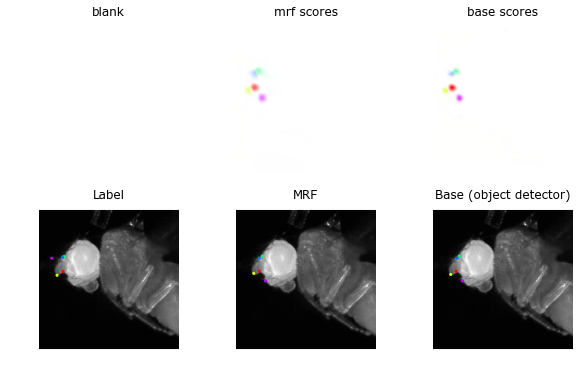

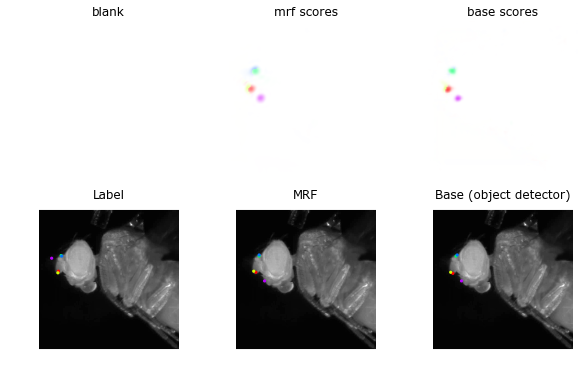

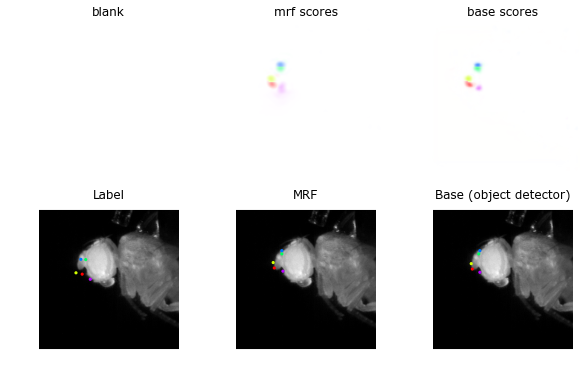

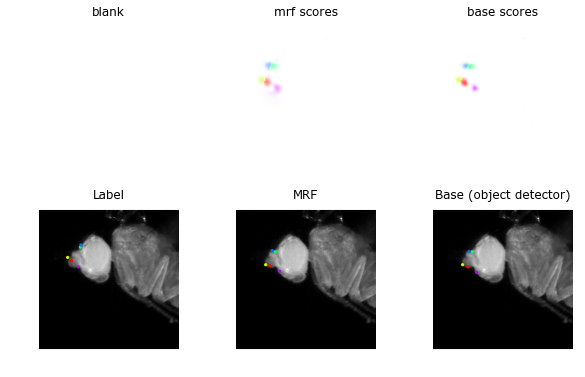

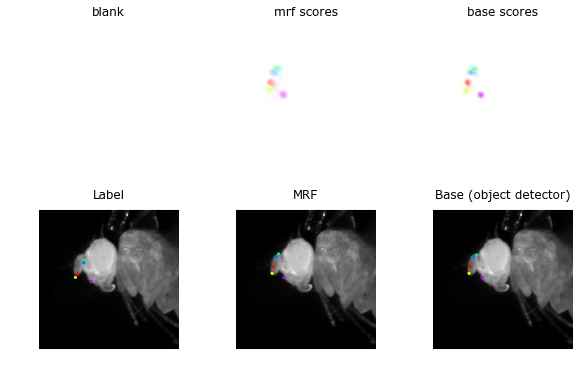

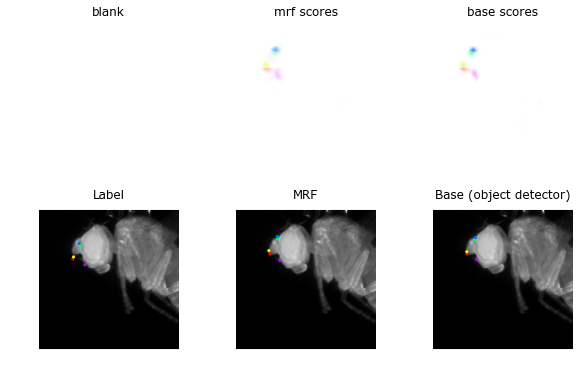

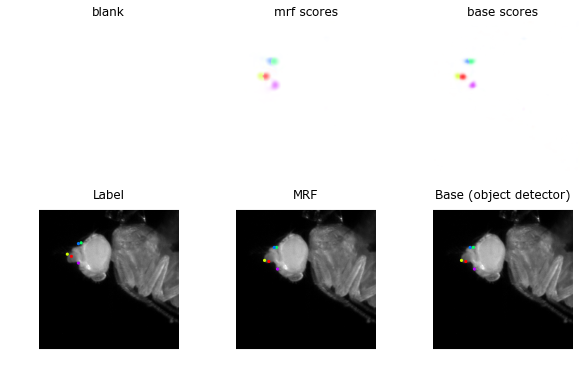

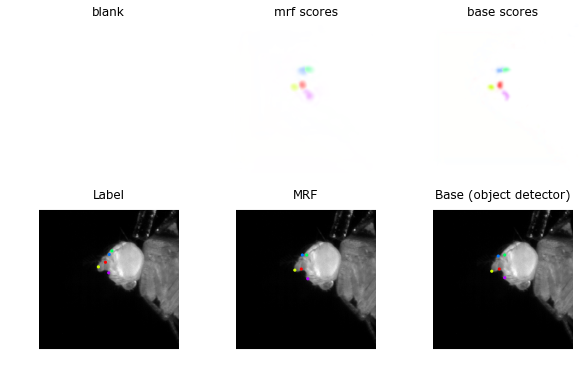

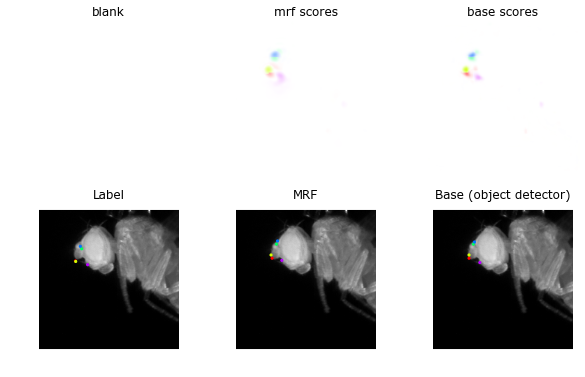

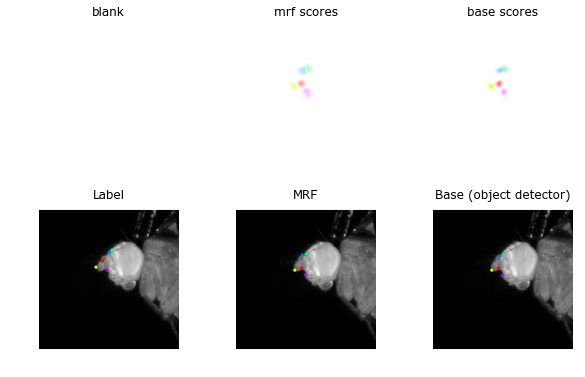

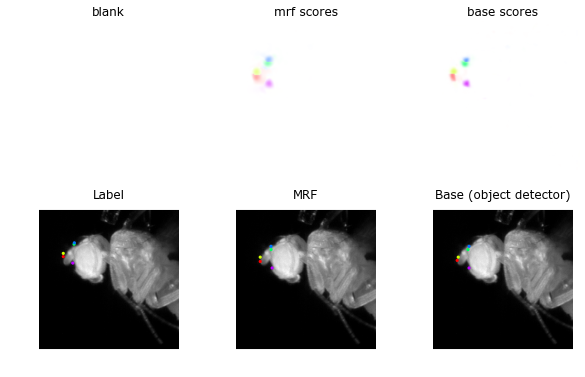

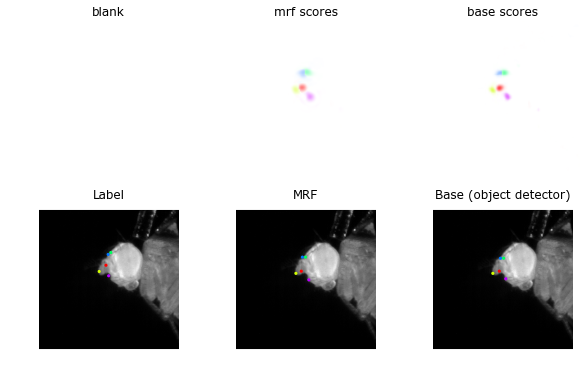

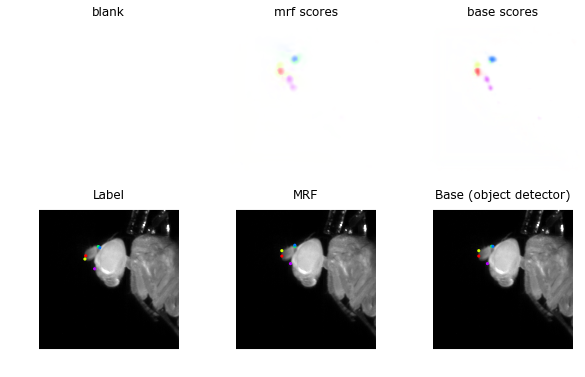

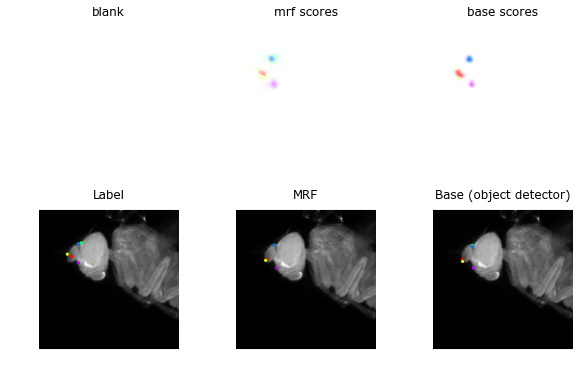

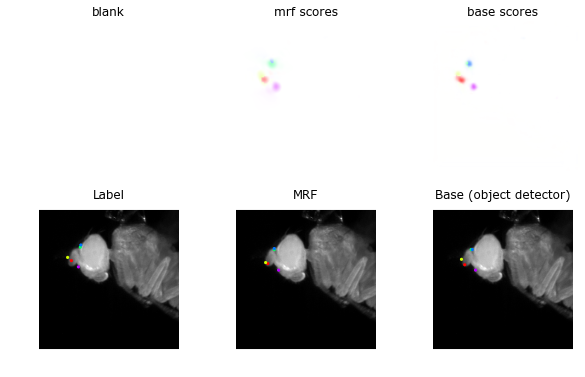

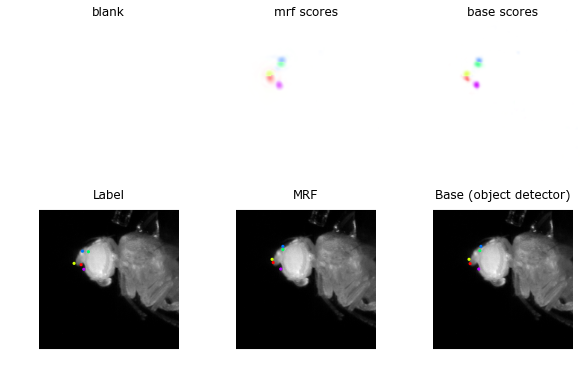

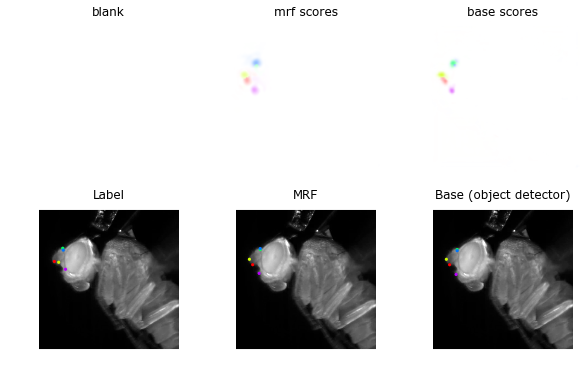

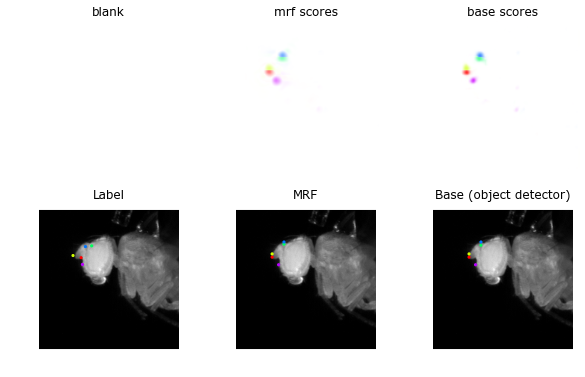

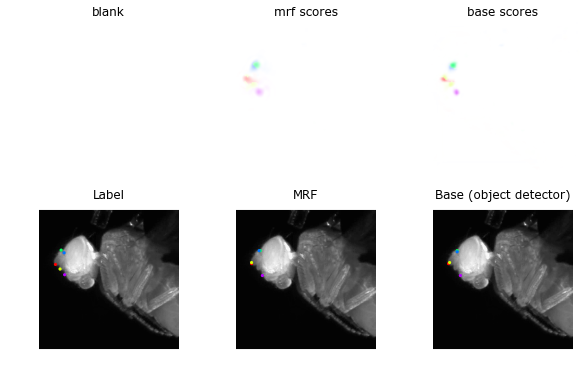

In [3]:
diff = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
bname = odir + 'MRF_impact_dmaxMRFLabel_%d.png'
dd = np.squeeze(np.apply_over_axes(np.sum,diff,[1,2]))
oo = dd.argsort()
# diffb = (predLocs[:,:,:,0]-predLocs[:,:,:,2])**2
# diffm = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
# ddb = np.squeeze(np.apply_over_axes(np.sum,diffb,[1,2])) 
# ddm = np.squeeze(np.apply_over_axes(np.sum,diffm,[1,2])) 
# # oo = (ddb-ddm).argsort()
# # bname = odir + 'MRF_impact_maxImprovement_%d.png'
# oo = (ddm-ddb).argsort()
# bname = odir + 'MRF_impact_minImprovement_%d.png'
print dd[oo[-4:-1]]
print dd[oo[:3]]
nc = 2
nr = 3
for ndx in range(1,20):
    curi = oo[-ndx]
    aa1 = PoseTools.createPredImage(all_preds[curi,:,:,:,0],conf.n_classes)
    aa2 = PoseTools.createPredImage(2*all_preds[curi,:,:,:,1]-1,conf.n_classes)
    fig = plt.figure(figsize=(10,6))
    ax2 = fig.add_subplot(nc,nr,1)
    ax2.set_title('blank')
    ax2.axis('off')
    ax1 = fig.add_subplot(nc,nr,3)
    ax1.imshow(aa1)
    ax1.axis('off')
    ax1.set_title('base scores')
    ax2 = fig.add_subplot(nc,nr,2)
    ax2.imshow(aa2)
    ax2.axis('off')
    ax2.set_title('mrf scores')
    ax3 = fig.add_subplot(nc,nr,4)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,2],predLocs[curi,:,1,2], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Label')
    ax3 = fig.add_subplot(nc,nr,5)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,1],predLocs[curi,:,1,1], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('MRF')
    ax3 = fig.add_subplot(nc,nr,6)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,0],predLocs[curi,:,1,0], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Base (object detector)')
    plt.show()
    fig.savefig(bname%ndx)

In [1]:
# classifying a particular frame
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import conf as conf
import myutils

conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)


Parameters that dont match for base:
batch_size doesnt match
useMRF doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Parameters that dont match for mrf:
batch_size doesnt match
useMRF doesnt match
Loading mrf variables from /home/mayank/work/poseEstimation/cacheHead/headMRF-6000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


200
[256, 256]
(56, 52)
0.0654484 -0.0139442
-0.758596 -1.02335


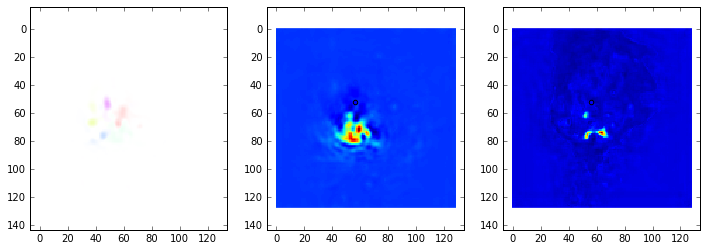

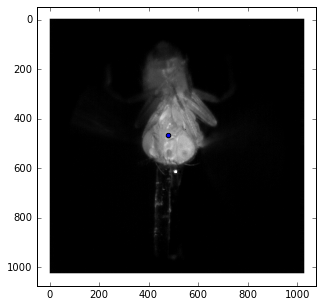

In [18]:
mov = '/groups/branson/home/kabram/bransonlab/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0019/fly_0019_trial_002/C002H001S0001/C002H001S0001.avi'
fnum = 200

predPair = [self.mrfPred,self.basePred,self.baseLayers['conv7']]
cap,nframes = PoseTools.openMovie(mov)
im = myutils.readframe(cap,fnum)
im.shape
x0,x1,x2 = PoseTools.processImage(im,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
pred = sess.run(predPair,self.feed_dict)
print fnum
locx = 480
locy = 465

cloc = conf.cropLoc[im.shape[0:2]]
print cloc
ftrloc = ((locx-cloc[0])/conf.pool_scale,(locy-cloc[1])/conf.pool_scale)
print ftrloc

predImg = PoseTools.createPredImage(pred[0][0,:,:,:]*2-1,conf.n_classes)
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,3,1)
sish(predImg,ax1)
ax2 = fig.add_subplot(1,3,2,sharex=ax1,sharey=ax1)
chn = 2
sish(pred[0][0,:,:,chn],ax2)
ax2.scatter(ftrloc[0],ftrloc[1])
ax2 = fig.add_subplot(1,3,3,sharex=ax1,sharey=ax1)
chn = 2
sish(pred[1][0,:,:,chn],ax2)
ax2.scatter(ftrloc[0],ftrloc[1])
print pred[0][0,:,:,chn].max(), pred[0][0,:,:,chn].min()
print pred[1][0,:,:,chn].max(), pred[1][0,:,:,chn].min()
plt.show()
fig = plt.figure(figsize = (5,5))
ish(im)
plt.scatter(locx,locy,hold=True)
selftr = pred[2][0,ftrloc[1],ftrloc[0],:]


In [19]:
from scipy.spatial import distance
import sys
self.openDBs()
self.createCursors()

numtr = self.env.stat()['entries']
tr_preds = np.zeros([numtr,]+self.basePred.get_shape().as_list()[1:]+[2,])
tr_maxsc = np.zeros([numtr,conf.n_classes])
tr_ims = np.zeros((numtr,)+conf.imsz)
tr_pred_locs = np.zeros([numtr,conf.n_classes,2,2])

self.train_cursor.first()
dmat = np.zeros((numtr,128,128))
for count in range(numtr):
    self.updateFeedDict(self.DBType.Train)
    curpred = sess.run([self.basePred,self.baseLayers['conv7']],feed_dict = self.feed_dict)
    tr_preds[count,:,:,:,0] = curpred[0]
    tr_maxsc[count,:] = curpred[0][0,:,:,:].max(axis=1).max(axis=0)
    curlocs = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    tr_pred_locs[count,:,:,0] = curlocs
    tr_pred_locs[count,:,:,1] = self.locs[0,:,:]
    tr_ims[count,:,:] = self.xs[0,0,:,:]
    curftr = curpred[1][0,:,:,:]
    dmat[count,:,:] = np.sum(np.abs(selftr-curftr),2)
    if count%10==0:
        sys.stdout.write('.')
    if count%100==0:
        sys.stdout.write('\n')
                        

.
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
......

In [20]:
oo = np.argsort(dmat.flatten())
oo.shape
[oi,oy,ox] = np.unravel_index(oo,dmat.shape)
for ndx in range(5):
    print dmat[oi[ndx],oy[ndx],ox[ndx]]

8.30312728882
8.6743183136
8.84585285187
8.91237831116
9.23424720764


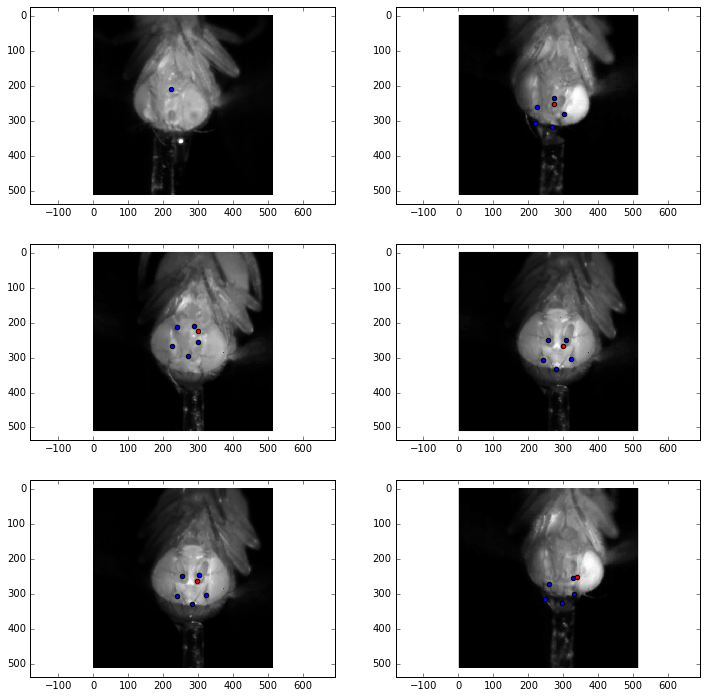

In [21]:
ncl = 5
fig = plt.figure(figsize = (12,12))
nc = 3
nr = 2
ax0 = fig.add_subplot(nc,nr,1)
sigray(im[256:-256,256:-256,:],ax0)
ax0.scatter(locx-256,locy-256)
for ndx in range(ncl):
    curi = oi[ndx]
    ax = fig.add_subplot(nc,nr,ndx+2,sharex=ax0,sharey=ax0)
    sigray(tr_ims[curi,:,:],ax)
    ax.scatter(tr_pred_locs[curi,:,0,1],tr_pred_locs[curi,:,1,1])
    ax.scatter(ox[ndx]*4,oy[ndx]*4,c='r')

In [1]:
#POSE EVAL initialize net for debugging
import tensorflow as tf
import os,sys
import caffe
import lmdb
import caffe.proto.caffe_pb2
from caffe.io import datum_to_array
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import cv2
import tempfile
import copy

from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf


tf.reset_default_graph()

phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)
feed_dict[phDict['phase_train']] = True

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],conf,phDict['phase_train'])

evalSaver = createEvalSaver(conf)
y = phDict['y']
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(out, y))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
baseNet = PoseTools.createNetwork(conf,1)
l7 = baseNet.baseLayers['conv7']
baseNet.openDBs()
txn = baseNet.env.begin()
valtxn = baseNet.valenv.begin()
sess = tf.InteractiveSession()
baseNet.createCursors(txn,valtxn)


baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)
prepareOpt(baseNet,baseNet.DBType.Train,feed_dict,sess,conf,phDict)

Parameters that dont match for base:
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Loading eval variables from /home/mayank/work/poseEstimation/cacheHead/headeval-4100
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:poseEval/lin_fc/weights/Adam:0
Initializing variable:poseEval/lin_fc/weights/Adam_1:0
Initializing variable:poseEval/lin_fc/biases/Adam:0
Initializing variable:poseEval/lin_fc/biases/Adam_1:0
Initializing variable:poseEval/lin_fc/batch_norm/beta/Adam:0
Initializing variable:poseEval/lin_fc/batch_norm/beta/Adam_1:0
Initializing variable:poseEval/lin_fc/batch_norm/gamma/Adam:0
Initializing variable:poseEval/lin_fc/batch_norm/gamma/Adam_1:0
Initializing variable:poseEval/loc_fc/weights/Adam:0
Initializing variable:poseEval/loc_fc/weights/Adam_1:0
Initializing variable:poseEval/loc_fc/biases/Adam:0
Initializing variable:poseEval/loc_fc/biases/Adam_1:0
Initializing variable:poseEval/loc_fc/batc

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [31]:
# Check pose eval accuracy interactively
from matplotlib import cm
import poseEval
reload(poseEval)
from poseEval import *

tot = 0
for ii in range(20):
    prepareOpt(baseNet,baseNet.DBType.Val,feed_dict,sess,conf,phDict)
    locs = baseNet.locs
    dd = feed_dict[phDict['lin']]


    cc = tf.nn.softmax_cross_entropy_with_logits(out, y)
    ss = tf.nn.softmax(out)
    [pred,cout,sout,cpred] = sess.run([out,cc,ss,correct_prediction],feed_dict = feed_dict)
    tot = tot + np.count_nonzero(cpred)
print tot/20/88

1


In [ ]:
#plot the generated points
from matplotlib import cm
import poseEval
reload(poseEval)
from poseEval import *

prepareOpt(baseNet,baseNet.DBType.Val,feed_dict,sess,conf,phDict)
locs = baseNet.locs
dd = feed_dict[phDict['locs']]
print dd.shape

sp = np.random.randint(41)
ini = np.random.randint(8)
print sp,ini
ins = baseNet.xs
plt.gray()
plt.imshow(ins[ini,0,:,:])
plt.scatter(dd[ini*41+sp,:,0],dd[ini*41+sp,:,1], hold=True,
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=10, linewidths=0, edgecolors='face')

In [29]:
# distribution of labeled points
from stephenHeadConfig import conf as conf
import PoseTools
import h5py

L = h5py.File(conf.labelfile,'r')
pts = np.array(L['pts'])[:,:,v,:]
v = conf.view
mm = pts.mean(axis=1)
print mm.shape
zz = pts-mm[:,np.newaxis,...]
smin = zz.min(axis=(0,1))
smax = zz.max(axis=(0,1))
pp =((smax-smin).max()).astype('int')+5
bfilt = np.zeros([pp,pp,5])
zz = zz-smin

for ndx in range(pts.shape[0]):
    for c1 in range(conf.n_classes):
        bfilt[ int(zz[ndx,c1,1])+1,int(zz[ndx,c1,0])+1,c1] += 1
bfilt = (bfilt/pts.shape[0])
bfilt = bfilt/bfilt.max()


fig = plt.figure()
for ndx in range(5):
    ax = fig.add_subplot(2,3,ndx+1)
    ax.imshow(bfilt[:,:,ndx],interpolation='nearest')

import cv2
predscores = bfilt
n_classes = 5
im = np.zeros(predscores.shape[0:2]+(3,))
im[:,:,0] = np.argmax(predscores,2).astype('float32')/(n_classes)*180
im[:,:,1] = (np.max(predscores,2))*255
im[:,:,2] = 255.
im = np.clip(im,0,255)
im = im.astype('uint8')
rimg = cv2.cvtColor(im,cv2.COLOR_HSV2RGB) 
    
fig = plt.figure();
ax = plt.imshow(rimg)
fig.savefig('/home/mayank/Dropbox/talks/labMeetingSep21_extra/joint_dist.png')

(2676, 2)


In [1]:
# Pose Eval training
import poseEval
reload(poseEval)
from stephenHeadConfig import conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseEval.train(conf,restore=False)

Parameters that dont match for base:
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Not loading eval variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter:0, train:0.6932 test:0.6932 acc:0.41 posacc:1.00
Neg:[ 0.0596875  0.         0.0003125]
Pred Acc Pos:1.0,Pred Acc Pred:0.9875,numclose:0.9875
Distance of incorrect predictions:[ 25.96150997  25.15949125  77.62731478  25.23885893]
Iter:25, train:0.6907 test:0.6907 acc:0.60 posacc:0.00
Neg:[ 1.  1.  1.]
Pred Acc Pos:0.0,Pred Acc Pred:0.021875,numclose:0.978125
Distance of incorrect predictions:[ 11.66190379   7.87400787   8.36660027  12.56980509   9.43398113
  18.38477631   7.          21.61018278  10.39230485  12.56980509
  13.03840481  17.34935157   7.81024968  20.22374842  14.79864859
  18.02775638   8.83176087   8.18535277  13.82027496  22.71563338
  13.22875656   9.94987437  12.08304597  11.04536102  10.14889157
  12.36931688  12.92284798  1

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
# Run pose eval on worst base predictions 

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf



from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)


self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[1,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


self.val_cursor.first()
self.train_cursor.first()
totacc = 0
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.
for count in range(numex):
    self.updateFeedDict(self.DBType.Train) #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = self.locs[0,:,:] # + 4*np.random.randn(conf.n_classes,2)
     #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    ims[count,:,:] = self.xs[0,0,:,:]
    
    l7 = baseNet.baseLayers['conv7']
    [bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)

    neglocs = predLocs[count,:,:,0:1,np.newaxis]
    neglocs = neglocs.transpose([2,0,1,3])
    locs = baseNet.locs
    alllocs = np.concatenate([neglocs,locs[...,np.newaxis]],axis=3)
    alldd = genData(l7out,alllocs,conf)
    alllocs = alllocs.transpose([0,3,1,2])
    alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
    alllocs_m = alllocs.mean(1)
    alllocs = alllocs-alllocs_m[:,np.newaxis,:]

    alldd = alldd.transpose([0,3,1,2])
    alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

    y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
    y[:,:-1,0] = 1. 
    y[:,-1,1] = 1.
    y = np.reshape(y,[-1,y.shape[-1]])

    feed_dict[phDict['y']] = y
    feed_dict[phDict['lin']] = alldd
    feed_dict[phDict['locs']] = alllocs
    
    evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)
    totacc = totacc + sess.run(accuracy,feed_dict=feed_dict)
print totacc/numex    

Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Loading eval variables from /home/mayank/work/poseEstimation/cacheHead/headeval-1000
0.499550763702


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f0b86969310>> ignored


In [31]:

self.val_cursor.first()
numex = self.env.stat()['entries']
ims = np.zeros( (numex,)+conf.imsz)
locs = np.zeros( (numex,5,2))
for count in range(numex):
    self.updateFeedDict(self.DBType.Train)
    locs[count,:,:] = self.locs[0,:,:] 
    ims[count,:,:] = self.xs[0,:,:] 


In [3]:
# Run pose eval on eval images with the same negs as training

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf



from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)


self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[1,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


self.val_cursor.first()
self.train_cursor.first()
totacc = 0
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.
vpred = np.zeros([numex,50,2])
vlocs = np.zeros([numex,50,5,2])
for count in range(5):
    rlocs = prepareOpt(baseNet,baseNet.DBType.Val,feed_dict,sess,conf,phDict) # ATTENTION!!!!!!
    feed_dict[phDict['phase_train']] = False
    feed_dict[phDict['dropout']] = 1
    val_pred = sess.run(out, feed_dict=feed_dict)
    vpred[count,:,:] = val_pred
    ims[count,:,:] = self.xs[0,0,:,:]
    vlocs[count,...] = rlocs

Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Loading eval variables from /home/mayank/work/poseEstimation/cacheHead/headeval-1000


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f21cacc7110>> ignored


Populating the interactive namespace from numpy and matplotlib
0


<IPython.core.display.Javascript object>


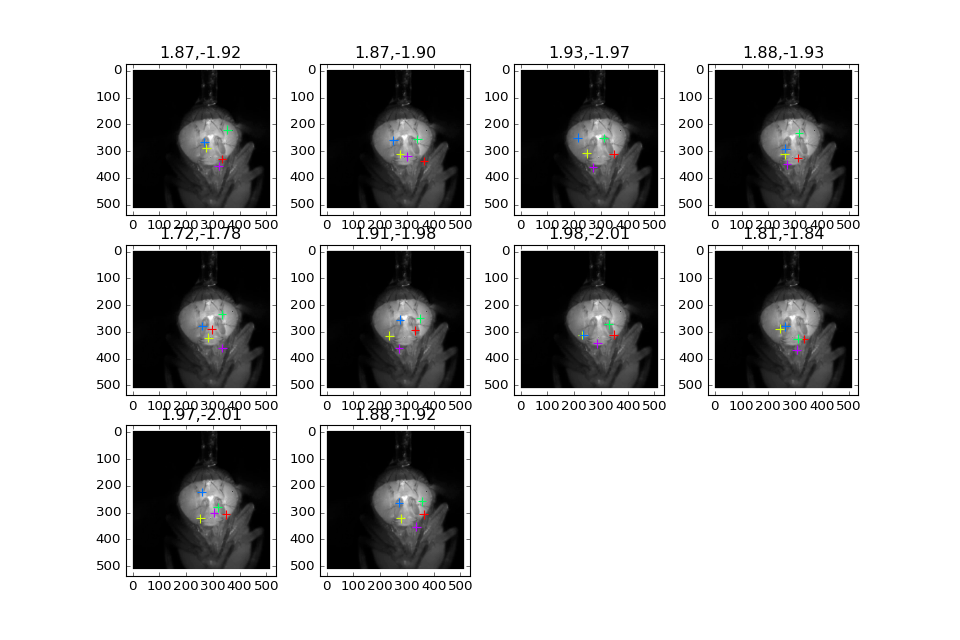

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

<IPython.core.display.Javascript object>


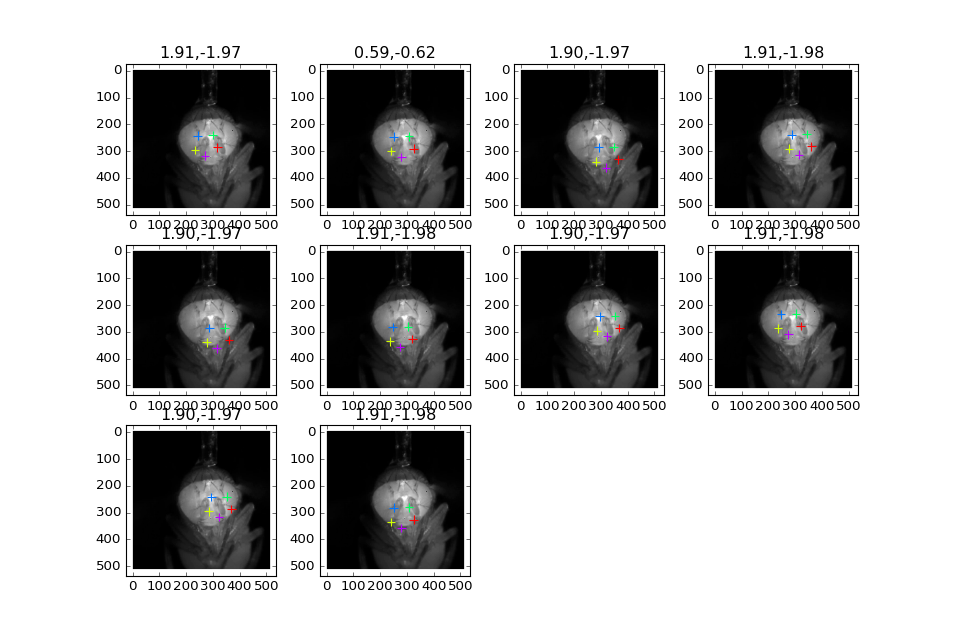

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

<IPython.core.display.Javascript object>


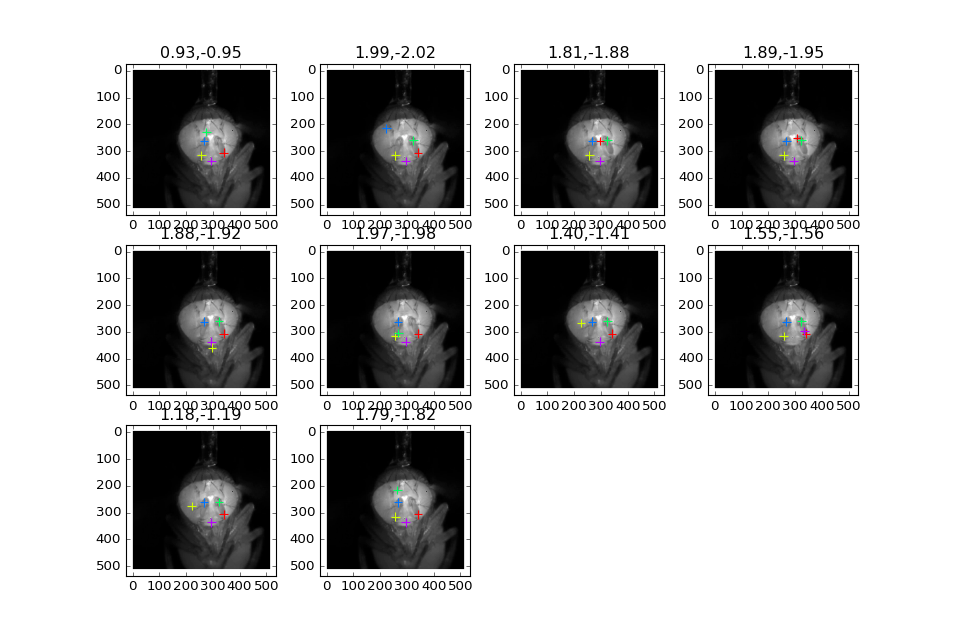

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

<IPython.core.display.Javascript object>


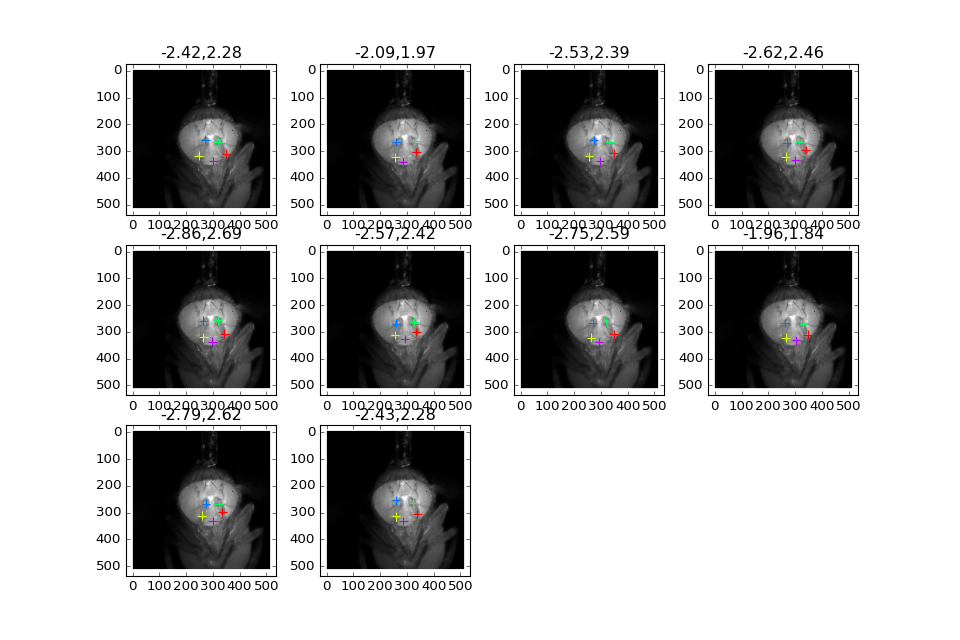

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

<IPython.core.display.Javascript object>


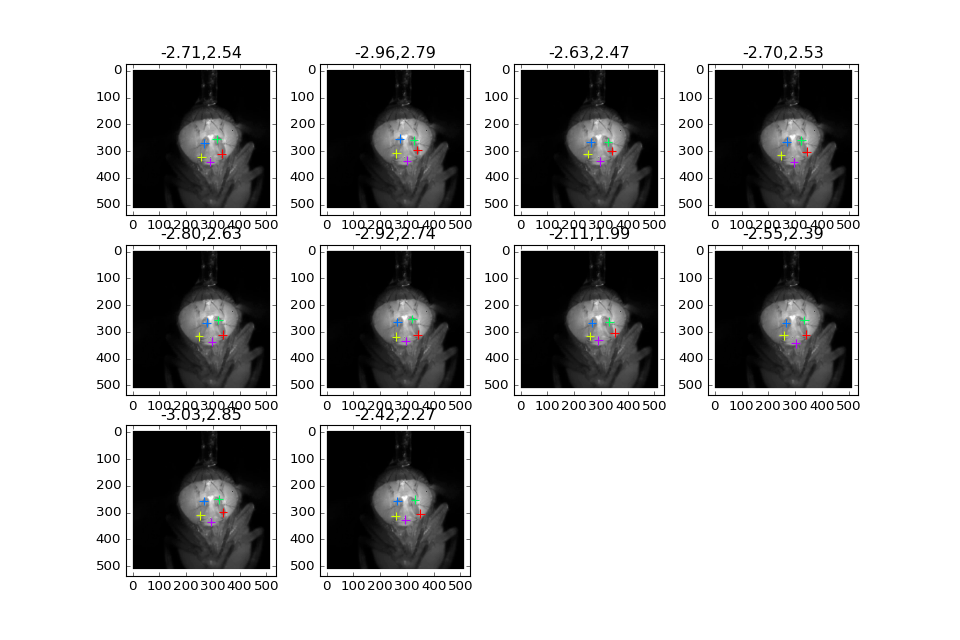

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

In [4]:
%pylab notebook
ex = np.random.randint(5)
print ex
for count in range(5):
    fig = plt.figure(figsize=(12,8))
    for ndx in range(10):
        ax = fig.add_subplot(3,4,ndx+1)
        ax.cla()
        ax.imshow(ims[ex,:,:],cmap='gray')
        ax.scatter(vlocs[ex,count*10+ndx,:,0],vlocs[ex,count*10+ndx,:,1],
                    c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                    s=60, linewidths=1, edgecolors='face',alpha=1,marker='+')
        ax.set_title('{:.2f},{:.2f}'.format(vpred[ex,count*10+ndx,0],vpred[ex,count*10+ndx,1]))
        

In [16]:
sigma = 5*0.5
rlocs = np.round(np.random.normal(size=(1,5,2,12))*sigma)
# remove rlocs that are small.
dlocs = np.sqrt( (rlocs**2).sum(2))
print dlocs.shape
kk = np.any(dlocs>5,1)
print kk
print kk.shape

(1, 5, 12)
[[ True False  True False  True  True  True  True False  True False False]]
(1, 12)


In [25]:
print vpred.shape
nn = vpred[:,:30,1].flatten()
plt.hist(nn)
print nn[::5000]
pp = vpred[:,30:,1].flatten()
plt.hist(pp)

(1113, 50, 2)
[-1.95591712 -0.15395139 -2.07540488 -0.6432156  -1.35921657 -2.09086585
 -2.04743123]


(array([  5.00000000e+00,   1.00000000e+01,   7.00000000e+00,
          1.10000000e+01,   1.90000000e+01,   3.20000000e+01,
          6.00000000e+01,   5.96000000e+02,   1.51250000e+04,
          6.39500000e+03]),
 array([-1.58189774, -1.11103685, -0.64017596, -0.16931508,  0.30154581,
         0.7724067 ,  1.24326758,  1.71412847,  2.18498936,  2.65585024,
         3.12671113]),
 <a list of 10 Patch objects>)

In [48]:
# Run pose eval on worst base predictions 


import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf



from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)


self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[1,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


self.val_cursor.first()
totacc = 0
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.
for count in range(5):
    self.updateFeedDict(self.DBType.Val) #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = self.locs[0,:,:] # + 4*np.random.randn(conf.n_classes,2)
     #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    ims[count,:,:] = self.xs[0,0,:,:]
    
    l7 = baseNet.baseLayers['conv7']
    [bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)

    neglocs = predLocs[count,:,:,0:1,np.newaxis]
    neglocs = neglocs.transpose([2,0,1,3])
    locs = baseNet.locs
    alllocs = np.concatenate([neglocs,locs[...,np.newaxis]],axis=3)
    alldd = genData(l7out,alllocs,conf)
    alllocs = alllocs.transpose([0,3,1,2])
    alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
    alllocs_m = alllocs.mean(1)
    alllocs = alllocs-alllocs_m[:,np.newaxis,:]

    alldd = alldd.transpose([0,3,1,2])
    alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

    y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
    y[:,:-1,0] = 1. 
    y[:,-1,1] = 1.
    y = np.reshape(y,[-1,y.shape[-1]])

    feed_dict[phDict['y']] = y
    feed_dict[phDict['lin']] = alldd
    feed_dict[phDict['locs']] = alllocs
    
    evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)
    totacc = totacc + sess.run(accuracy,feed_dict=feed_dict)
print totacc/numex    

Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Loading eval variables from /home/mayank/work/poseEstimation/cacheHead/headeval-1000
0.00224618149146


In [ ]:
%pylab notebook
diff = (predLocs[:,:,:,0]-predLocs[:,:,:,1])**2
dd = np.squeeze(np.sqrt(np.apply_over_axes(np.sum,diff,[1,2])))
oo = dd.argsort()
oo = np.flipud(oo)

jj = evalScores[:,0,1]
oo = jj.argsort()

ndx = np.random.randint(7)
for ndx in range(16):
    curidx = oo[ndx]
    fig = plt.figure()
    ax = fig.add_subplot(231)
    ax.cla()
    ax.imshow(ims[curidx,:,:],cmap='gray')
    ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0],
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=60, linewidths=1, edgecolors='face',alpha=1,marker='+')
    ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=20, linewidths=0, edgecolors='face')
    ax.set_title('Lab(o):{:.2f}, Pred(+):{:.2f}'.format(evalScores[curidx,1,1],evalScores[curidx,0,1]))
    for pp in range(5):
        ax = fig.add_subplot(2,3,pp+2)
        ax.cla()
        ax.imshow(all_preds[curidx,:,:,pp,0],interpolation='nearest')
        ax.set_title('Max{:.2f},Min{:.2f}'.format(all_preds[curidx,:,:,pp,0].max(),all_preds[curidx,:,:,pp,0].min()))
#     plt.savefig('/home/mayank/work/poseEstimation/results/poseEval/topLabeledScores{}'.format(ndx+1),
#                dpi=200,facecolor='w',transparent=True)

In [ ]:
diff = (predLocs[:,:,:,0]-predLocs[:,:,:,1])**2
dd = np.squeeze(np.sqrt(np.apply_over_axes(np.sum,diff,[1,2])))
oo = dd.argsort()
oo = np.flipud(oo)

dd = dd[oo]
ee = evalScores[oo,:,:]
nsel = 7
plt.scatter(ee[:nsel,0,1],dd[:nsel])
plt.scatter(ee[:nsel,1,1],dd[:nsel],c=[0,1,0],hold=True)
print float(np.count_nonzero(ee[:nsel,1,1]>0))/nsel
print float(np.count_nonzero(ee[:nsel,0,0]>0))/nsel

In [1]:
# Prepare for eval for movie frames i.e., next cell

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.


Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Loading eval variables from /home/mayank/work/poseEstimation/cacheHead/headeval-1000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


[[[ 280.  280.]
  [ 228.  228.]]

 [[ 192.  192.]
  [ 232.  232.]]

 [[ 332.  332.]
  [ 476.  476.]]

 [[ 252.  252.]
  [ 216.  216.]]

 [[ 252.  252.]
  [ 272.  272.]]]


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/numpy-1.12.0.dev0+9cfdb21-py2.7-linux-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning


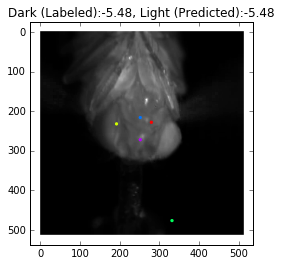

In [2]:
# performance of pose eval on frames


mov = '/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi'
fnum = 200

count = 0
numex = 1
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])
ims = np.zeros([numex,512,512])


cap,nframes = PoseTools.openMovie(mov)
im = myutils.readframe(cap,fnum)

x0,x1,x2 = PoseTools.processImage(im,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2

curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
predLocs[count,:,:,1] = predLocs[count,:,:,0]
# predLocs[count,4,0,1] = 267
# predLocs[count,4,1,1] = 267
# predLocs[count,0,0,1] = 296
# predLocs[count,0,1,1] = 215
# predLocs[count,1,0,1] = 211
# predLocs[count,1,1,1] = 231
ims[count,:,:] = x0[0,:,:,0]

l7 = baseNet.baseLayers['conv7']
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)

neglocs = predLocs[count,:,:,0:1,np.newaxis]
neglocs = neglocs.transpose([2,0,1,3])
locs = predLocs[count,:,:,1:,np.newaxis]
locs = locs.transpose([2,0,1,3])
alllocs = np.concatenate([neglocs,locs],axis=3)
alldd = genData(l7out,alllocs,conf)
alllocs = alllocs.transpose([0,3,1,2])
alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
alllocs_m = alllocs.mean(1)
alllocs = alllocs-alllocs_m[:,np.newaxis,:]

alldd = alldd.transpose([0,3,1,2])
alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
y[:,:-1,0] = 1. 
y[:,-1,1] = 1.
y = np.reshape(y,[-1,y.shape[-1]])

feed_dict[phDict['y']] = y
feed_dict[phDict['lin']] = alldd
feed_dict[phDict['locs']] = alllocs

evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)

curidx = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.flipud(ims[curidx,:,:]),cmap='gray')
ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0], 
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=10, linewidths=0, edgecolors='face',alpha=0.4)
ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=10, linewidths=0, edgecolors='face')
ax.set_title('Dark (Labeled):{:.2f}, Light (Predicted):{:.2f}'.format(evalScores[curidx,1,1],evalScores[curidx,0,1]))
print predLocs[0,...]
# plt.savefig('/home/mayank/work/poseEstimation/results/poseEval/fly245_failures{}'.format(fnum+1),
#            dpi=200)

Populating the interactive namespace from numpy and matplotlib
[[[ 200.  456.]
  [ 224.  292.]
  [ 260.  308.]
  [ 220.  296.]
  [ 240.  468.]]

 [[ 266.  358.]
  [ 204.  336.]
  [ 279.  321.]
  [ 223.  294.]
  [ 229.  374.]]]


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


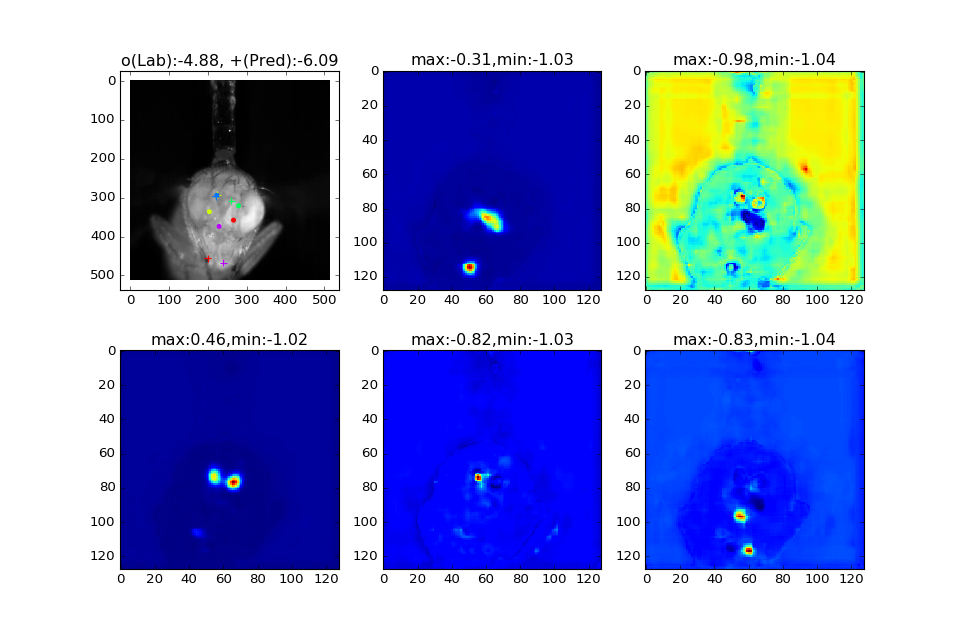

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

In [2]:
# performance of pose eval on frames
%pylab notebook
import copy
# mov = '/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi'
# fnum = 721
mov = '/home/mayank/Dropbox/PoseEstimation/Stephen/fly325/C002H001S0020/C002H001S0020_c.avi'
fnum = 405

cap,nframes = PoseTools.openMovie(mov)
im1 = myutils.readframe(cap,fnum)
fnum = 582
im2 = myutils.readframe(cap,fnum)

ra = 0.16
dd = im1.astype('double') - im2.astype('double')
# im1 = ( im1.astype('double') + ra*dd).astype('uint8')

count = 0
numex = 1
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])
ims = np.zeros([numex,512,512])
all_preds = np.zeros([2,128,128,5])



x0,x1,x2 = PoseTools.processImage(im1,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
x01= x0
    
curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
# predLocs[count,:,:,1] =  np.array([[276,320],[205,285],[276,276],[240,248],[228,328]])
predLocs[count,:,:,1] = [[394,358],[ 332,336], [407,321], [351,294], [357,374]]
predLocs[count,:,:,1] -= [128,0]

# predLocs[count,:,:,0] = predLocs[count,:,:,1] + 4*np.random.randn(5,2)
# predLocs[count,:,:,1] =  np.array([[284,228],[209,235],[253,182],[210,190],[272,252]])
# predLocs[count,:,:,1] = predLocs[count,:,:,0]
ims[count,:,:] = x0[0,:,:,0]

l7 = baseNet.baseLayers['conv7']
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)
l7out1 = l7out
all_preds[0,...] = bout

x0,x1,x2 = PoseTools.processImage(im2,conf)
x02 = x0
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)
l7out2 = l7out
all_preds[1,...] = bout

neglocs = predLocs[count,:,:,0:1,np.newaxis]
neglocs = neglocs.transpose([2,0,1,3])
locs = predLocs[count,:,:,1:,np.newaxis]
locs = locs.transpose([2,0,1,3])
alllocs = np.concatenate([neglocs,locs],axis=3)
alldd1 = genData(l7out1,alllocs,conf)
alldd2 = genData(l7out2,alllocs,conf)

# alldd_mixed = copy.deepcopy(alldd1)
# selpt = np.array([0,1,2,3,4])
# alldd_mixed[:,selpt,:,:] = alldd2[:,selpt,:,:]
# alldd = alldd_mixed.transpose([0,3,1,2])

alldd = alldd1.transpose([0,3,1,2])
alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

# alldd = alldd[ [1,0],:,:] # ATTENTION!!!!!!!!!!!!!
swapdim = [] # ATTENTION!!!!!!!!!!!!!
for ss in swapdim:
    alldd[:,ss,:] = alldd[[1,0],ss,:]

alllocs = alllocs.transpose([0,3,1,2])
alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
print alllocs
alllocs_m = alllocs.mean(1)
alllocs = alllocs-alllocs_m[:,np.newaxis,:]

y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
y[:,:-1,0] = 1. 
y[:,-1,1] = 1.
y = np.reshape(y,[-1,y.shape[-1]])

feed_dict[phDict['y']] = y
feed_dict[phDict['lin']] = alldd
feed_dict[phDict['locs']] = alllocs

evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)

curidx = 0
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(231)
ax.imshow(x01[0,:,:,0],cmap='gray')
ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0], 
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=40, linewidths=1, edgecolors='face',marker='+')
ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=20, linewidths=0, edgecolors='face')
ax.set_title('o(Lab):{:.2f}, +(Pred):{:.2f}'.format(evalScores[curidx,1,1],evalScores[curidx,0,1]))
for pp in range(5):
    ax = fig.add_subplot(2,3,pp+2)
    ax.imshow(all_preds[0,:,:,pp],interpolation='nearest')
    ax.set_title('max:{:.2f},min:{:.2f}'.format(all_preds[0,:,:,pp].max(),all_preds[0,:,:,pp].min()))
# print predLocs[0,...]
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.imshow(((x01[0,...,0].astype('double')-x02[0,...,0].astype('double')))/40+0.5,cmap='gray')


<IPython.core.display.Javascript object>


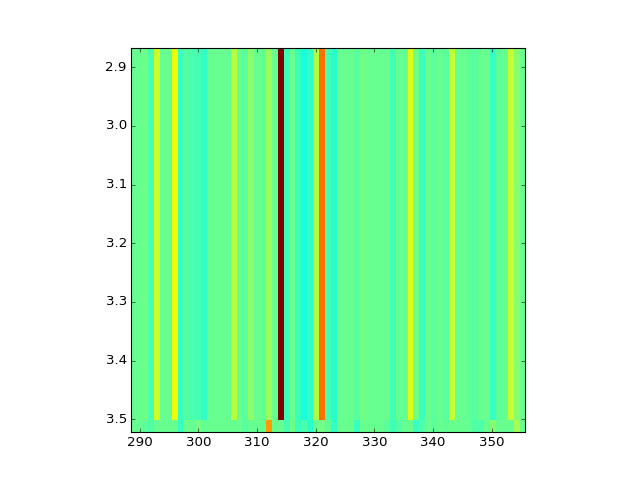

(512,)
(1, 5, 512, 2)


In [57]:
kk= alldd1-alldd2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(kk[0,...,0],interpolation='nearest')
ax.set_aspect(100)
vvl7 = l7out.var(1).var(1).squeeze()
print vvl7.shape
print alldd1.shape
gg = kk[...,0]/vvl7
ax = fig.add_subplot(111)
imx = ax.imshow(gg[0,...],interpolation='nearest')
ax.set_aspect(100)
imx.colorbar

In [3]:
# Prepare for eval for movie frames i.e., next cell

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = True # ATTENTION! !!!!!!!!!!!!
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
baseNet.restoreMRF(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.


Parameters that dont match for base:
batch_size doesnt match
useMRF doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Parameters that dont match for mrf:
batch_size doesnt match
useMRF doesnt match
Loading mrf variables from /home/mayank/work/poseEstimation/cacheHead/headMRF-6000
Loading eval variables from /home/mayank/work/poseEstimation/cacheHead/headeval-1000


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f2a2c253610>> ignored


Populating the interactive namespace from numpy and matplotlib
[[[ 248.  348.]
  [ 152.  340.]
  [ 260.  308.]
  [ 168.  300.]
  [ 220.  384.]]]
[[[ 266.  358.]
  [ 204.  336.]
  [ 279.  321.]
  [ 223.  294.]
  [ 229.  374.]]]


<IPython.core.display.Javascript object>


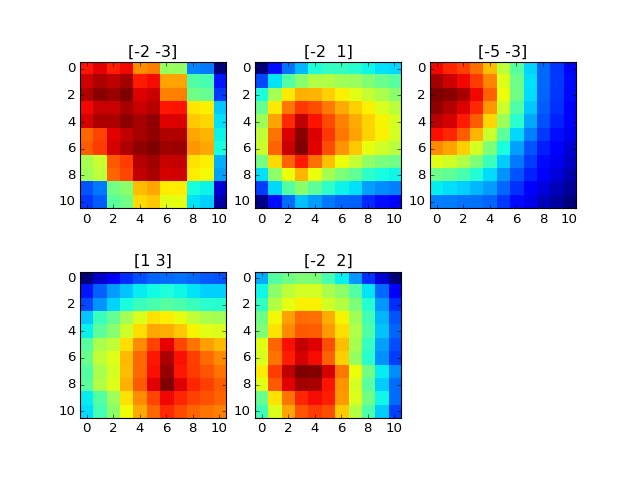

<IPython.core.display.Javascript object>


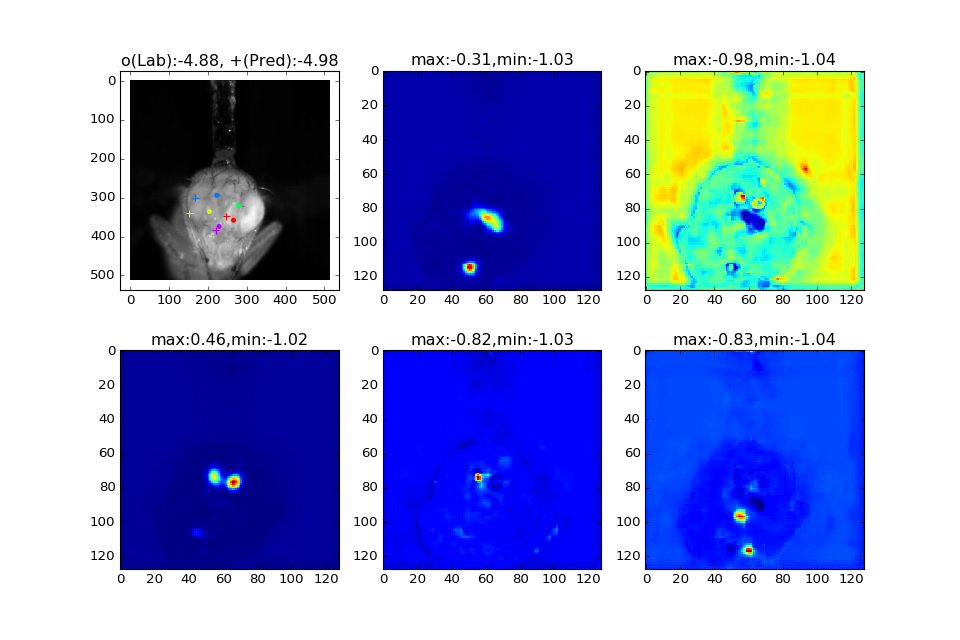

<IPython.core.display.Javascript object>


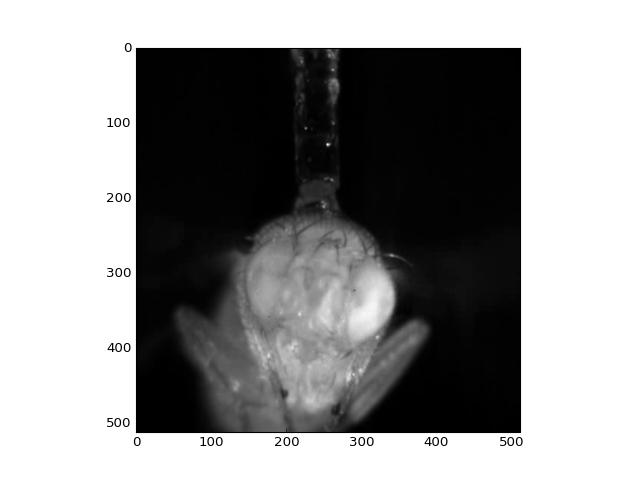

In [6]:
# performance of pose eval on frames
%pylab notebook
import copy
# mov = '/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi'
# fnum = 713
mov = '/home/mayank/Dropbox/PoseEstimation/Stephen/fly325/C002H001S0020/C002H001S0020_c.avi'
fnum = 405
cap,nframes = PoseTools.openMovie(mov)
im1 = myutils.readframe(cap,fnum)


count = 0
numex = 1
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])
all_preds = np.zeros([2,128,128,5])
import cv2
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
# im1 = clahe.apply(im1[:,:,:1])
im1 = im1[:,:,0]
x0,x1,x2 = PoseTools.processImage(im1[:,:,np.newaxis],conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
x01 = x0
    
curpred = sess.run([self.mrfPred,],feed_dict = self.feed_dict)
predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
# predLocs[count,:,:,1] =  np.array([[276,300-4*0],[208-4*0,284+4*0],[271-4*0,255-4*0],[238-4*0,258+4*0],[236+4*0,324+4*0]])
predLocs[count,:,:,1] = [[394,358],[ 332,336], [407,321], [351,294], [357,374]]
predLocs[count,:,:,1] -= [128,0]
print predLocs[...,0]
print predLocs[...,1]

l7 = baseNet.baseLayers['conv7']
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)
l7out1 = l7out
all_preds[0,...] = bout

fig = plt.figure()
for selpt in range(5):
    rr = 5
    ssImg = np.zeros([2*rr+1,2*rr+1])
    for xx in range(-rr,rr+1):
        for yy in range(-rr,rr+1):
            neglocs = predLocs[count,:,:,0:1,np.newaxis]
            neglocs = neglocs.transpose([2,0,1,3])
            locs = copy.deepcopy(predLocs[count,:,:,1:,np.newaxis])
            locs[selpt,0] = locs[selpt,0]+4*xx
            locs[selpt,1] = locs[selpt,1]+4*yy
            locs = locs.transpose([2,0,1,3])
            alllocs = np.concatenate([neglocs,locs],axis=3)

            alldd1 = genData(l7out1,alllocs,conf)
            alldd = alldd1.transpose([0,3,1,2])
            alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

            alllocs = alllocs.transpose([0,3,1,2])
            alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
            alllocs_m = alllocs.mean(1)
            alllocs = alllocs-alllocs_m[:,np.newaxis,:]

            y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
            y[:,:-1,0] = 1. 
            y[:,-1,1] = 1.
            y = np.reshape(y,[-1,y.shape[-1]])

            feed_dict[phDict['y']] = y
            feed_dict[phDict['lin']] = alldd
            feed_dict[phDict['locs']] = alllocs

            evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)
            ssImg[yy+rr,xx+rr] = evalScores[count,1,1]

    curidx = 0
    ax = fig.add_subplot(2,3,selpt+1)
    ax.imshow(ssImg,interpolation='nearest')
    idx = np.flipud(np.unravel_index(ssImg.argmax(), ssImg.shape))
    ax.set_title('{:}'.format(np.array(idx)-rr))
fig2 = plt.figure(figsize=(12,8))
ax = fig2.add_subplot(231)
ax.imshow(x01[0,:,:,0],cmap='gray')
ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0], 
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=40, linewidths=1, edgecolors='face',marker='+')
ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=20, linewidths=0, edgecolors='face')
ax.set_title('o(Lab):{:.2f}, +(Pred):{:.2f}'.format(ssImg[rr,rr],evalScores[curidx,0,1]))
for pp in range(5):
    ax = fig2.add_subplot(2,3,pp+2)
    ax.imshow(all_preds[0,:,:,pp],interpolation='nearest')
    ax.set_title('max:{:.2f},min:{:.2f}'.format(all_preds[0,:,:,pp].max(),all_preds[0,:,:,pp].min()))
fig = plt.figure()
imshow(x01[0,...,0],cmap='gray')

In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from cvc import cvc


# For FRONT
from stephenHeadConfig import conf as conf
conf.useMRF = True
outtype = 2
extrastr = ''

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

valmovies = ['/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi']
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/home/mayank/work/poseEstimation/results/poseEval/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        

    if not os.path.isfile(valmovies[ndx]):
        continue
    
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cvc.FRAME_HIEGHT))
    width = int(cap.get(cvc.FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})
    print 'Done:%s'%oname



print pp
print predList[1].shape

Parameters that dont match for base:
useMRF doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Parameters that dont match for mrf:
useMRF doesnt match
Loading mrf variables from /home/mayank/work/poseEstimation/cacheHead/headMRF-6000
....................
....................
....................
....................
....................
....................
....................
....................
....................
.

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/numpy-1.12.0.dev0+9cfdb21-py2.7-linux-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will ret

.

AttributeError: type object 'cvc' has no attribute 'FRAME_HIEGHT'

In [ ]:
self.openDBs()
self.createCursors()

<IPython.core.display.Javascript object>


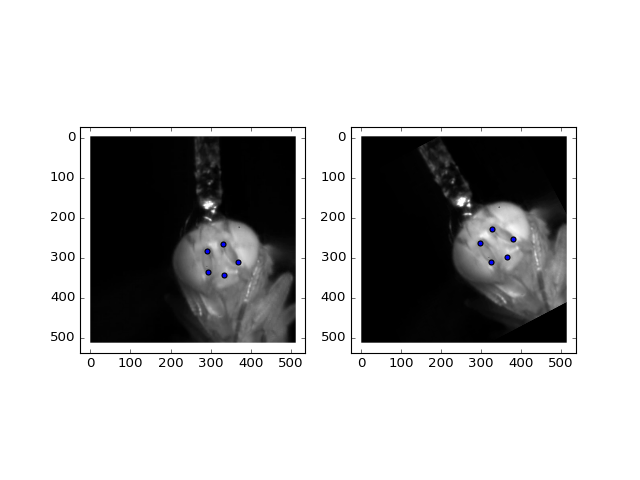

In [28]:
self.updateFeedDict(self.DBType.Train,distort=False)

import copy
import PoseTools
reload(PoseTools)

import stephenHeadConfig
reload(stephenHeadConfig)
from stephenHeadConfig import conf as conf
oldxs = copy.deepcopy(self.xs)
oldl = copy.deepcopy(self.locs)

xs = self.xs
locs = self.locs
if conf.horzFlip:
    xs,locs = PoseTools.randomlyFlipLR(xs,locs)
if conf.vertFlip:
    xs,locs = PoseTools.randomlyFlipUD(xs,locs)
xs,locs = PoseTools.randomlyRotate(xs,locs,conf)
xs = PoseTools.randomlyAdjust(xs,conf)

for ndx in range(self.xs.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(oldxs[ndx,0,...],cmap='gray')
    ax.scatter(oldl[ndx,:,0],oldl[ndx,:,1])
    
    ax = fig.add_subplot(122)
    ax.imshow(self.xs[ndx,0,...],cmap='gray')
    ax.scatter(self.locs[ndx,:,0],self.locs[ndx,:,1])

<IPython.core.display.Javascript object>


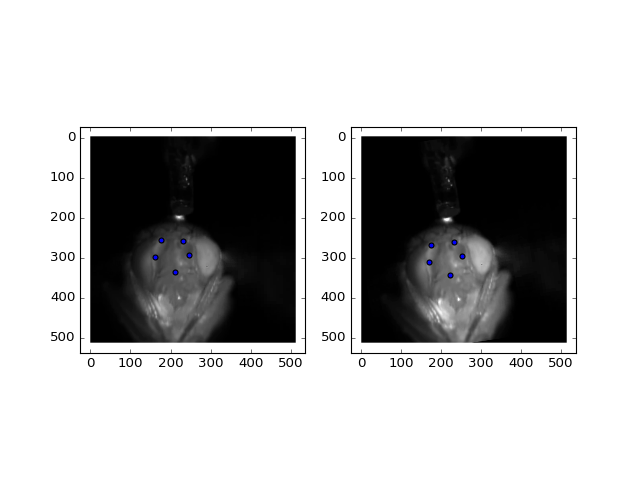

In [20]:
import copy
import PoseTools
reload(PoseTools)
oldxs = copy.deepcopy(self.xs)
oldl = copy.deepcopy(self.locs)

xs = self.xs
locs = self.locs
if conf.horzFlip:
    xs,locs = PoseTools.randomlyFlipLR(xs,locs)
if conf.vertFlip:
    xs,locs = PoseTools.randomlyFlipUD(xs,locs)
xs,locs = PoseTools.randomlyRotate(xs,locs,conf)
xs = PoseTools.randomlyAdjust(xs,conf)

for ndx in range(self.xs.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(oldxs[ndx,0,...],cmap='gray')
    ax.scatter(oldl[ndx,:,0],oldl[ndx,:,1])
    
    ax = fig.add_subplot(122)
    ax.imshow(self.xs[ndx,0,...],cmap='gray')
    ax.scatter(self.locs[ndx,:,0],self.locs[ndx,:,1])

In [2]:
# Impact of dropout on base
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from cvc import cvc


# For FRONT
from stephenHeadConfig import conf as conf
conf.useMRF = False
outtype = 1
extrastr = ''

conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

self.openDBs()
self.createCursors()

l7 = self.baseLayers['conv7']
with tf.variable_scope('base/layer8') as scope:
    scope.reuse_variables()
    l7_do = tf.nn.dropout(l7,self.ph['keep_prob'],[conf.batch_size,1,1,conf.nfcfilt])
    l8_weights = tf.get_variable("weights", [1,1,conf.nfcfilt,conf.n_classes],
        initializer=tf.random_normal_initializer(stddev=0.01))
    l8_biases = tf.get_variable("biases", conf.n_classes,
        initializer=tf.constant_initializer(0))
    l8 = tf.nn.conv2d(l7_do,l8_weights,strides=[1,1,1,1],padding='SAME')+l8_biases



Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [ ]:
self.updateFeedDict(self.DBType.Train,distort=False)

self.feed_dict[self.ph['phase_train_base']] = False
self.feed_dict[self.ph['phase_train_fine']] = False
self.feed_dict[self.ph['keep_prob']] = 0.1

outpred = sess.run([self.basePred,l8,l7_do,l7],feed_dict=self.feed_dict)
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(4,3,1)
ax.imshow(self.xs[0,0,...],cmap='gray')
ax.scatter(self.locs[0,:,0],self.locs[0,:,1])
predLocs = PoseTools.getBasePredLocs(outpred[1],conf)[0,:,:]
ax = fig.add_subplot(4,3,7)
ax.imshow(self.xs[0,0,...],cmap='gray')
ax.scatter(predLocs[:,0],predLocs[:,1])
for ndx in range(5):
    ax = fig.add_subplot(4,3,ndx+2)
    kk = outpred[0][0,...,ndx]
    ax.imshow(outpred[0][0,...,ndx])
    ax.axis('off')
    ax.set_title('{:.2f},{:.2f}'.format(kk.max(),kk.min()))
    ax = fig.add_subplot(4,3,ndx+6+2)
    kk = outpred[1][0,...,ndx]
    ax.imshow(kk)
    ax.axis('off')
    ax.set_title('{:.2f},{:.2f}'.format(kk.max(),kk.min()))

In [2]:
# Pose Gen training
import poseGen
reload(poseGen)
import stephenHeadConfig
reload(stephenHeadConfig)
from stephenHeadConfig import conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseGen.train(conf,restore=False)

Parameters that dont match for base:
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Not loading gen variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter:0, mean y:14.11 train:102.0038 test:113.9443 
Iter:25, mean y:9.16 train:92.3523 test:118.6216 
Iter:50, mean y:30.16 train:90.5370 test:124.7680 
Iter:75, mean y:15.24 train:77.8671 test:121.7357 
Iter:100, mean y:19.62 train:81.8641 test:121.6043 
Iter:125, mean y:25.23 train:109.6665 test:119.7941 
Iter:150, mean y:25.60 train:128.2067 test:117.6810 
Iter:175, mean y:15.50 train:43.4913 test:106.6013 
Iter:200, mean y:21.05 train:110.9982 test:129.4753 
Iter:225, mean y:23.80 train:99.7839 test:118.9033 
Iter:250, mean y:28.24 train:117.1883 test:125.9656 
Iter:275, mean y:32.27 train:111.1535 test:117.9132 
Iter:300, mean y:19.98 train:109.4309 test:126.0703 
Iter:325, mean y:22.84 train:42.8153 test:113.1909 
Iter:350, mean y:15.68 train:12

In [8]:
# check gradients

import poseGen
reload(poseGen)
from poseGen import *
from stephenHeadConfig import conf as conf
import re


tf.reset_default_graph()
restore = False
phDict = createGenPH(conf)
feed_dict = createFeedDict(phDict)
feed_dict[phDict['phase_train']] = True
feed_dict[phDict['dropout']] = 0.02
feed_dict[phDict['y']] = np.zeros((conf.batch_size,conf.n_classes*2))
baseNet = PoseTools.createNetwork(conf,1)
l8 = addDropoutLayer(baseNet,phDict['dropout'],conf)
with tf.variable_scope('poseGen'):
    out,layer_dict = poseGenNet(phDict['locs'],phDict['scores'],l8,
                                 conf,baseNet,phDict['phase_train'])

genSaver = createGenSaver(conf)
y = phDict['y']
loss = tf.nn.l2_loss(out-y)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)
baseNet.openDBs()
baseNet.feed_dict[phDict['dropout']] = feed_dict[phDict['dropout']]

txn = baseNet.env.begin()
valtxn = baseNet.valenv.begin()
sess = tf.InteractiveSession()

baseNet.createCursors()
baseNet.restoreBase(sess,True)
didRestore,startat = restoreGen(sess,conf,genSaver,restore)
baseNet.initializeRemainingVars(sess)

posevars = []
uu = []
for vv in tf.all_variables():
    if vv.name[:7] == 'poseGen' and not re.search('batch_norm',vv.name) \
    and not re.search('Adam',vv.name) and not re.search('biases',vv.name):
        posevars.append(vv)
        uu.append(vv.eval())
for ndx in range(len(uu)):
    vvar = uu[ndx].std()
    print '{:30}:{:.2e}'.format(posevars[ndx].name,
          vvar)

prepareOpt(baseNet,l8,baseNet.DBType.Train,feed_dict,sess,conf,
           phDict,distort=True)
feed_dict[phDict['phase_train']] = True
sess.run(train_step, feed_dict=feed_dict)

posevars = []
uu = []
for vv in tf.all_variables():
    if vv.name[:7] == 'poseGen' and not re.search('batch_norm',vv.name) \
    and not re.search('Adam',vv.name) and not re.search('biases',vv.name):
        posevars.append(vv)
        uu.append(vv.eval())
ll = tf.gradients(loss,posevars)        
gg = sess.run(ll,feed_dict=feed_dict)
for ndx,curg in enumerate(gg):
    gvar = curg.std()
    vvar = uu[ndx].std()
    print '{:30}:{:.2e},{:.2e},{:.2e}'.format(posevars[ndx].name,
          vvar,gvar,vvar/gvar)
    
for step in range(25):
    prepareOpt(baseNet,l8,baseNet.DBType.Train,feed_dict,sess,conf,
               phDict,distort=True)
    feed_dict[phDict['phase_train']] = True
    sess.run(train_step, feed_dict=feed_dict)


posevars = []
uu = []
for vv in tf.all_variables():
    if vv.name[:7] == 'poseGen' and not re.search('batch_norm',vv.name) \
    and not re.search('Adam',vv.name) and not re.search('biases',vv.name):
        posevars.append(vv)
        uu.append(vv.eval())
ll = tf.gradients(loss,posevars)        
gg = sess.run(ll,feed_dict=feed_dict)
for ndx,curg in enumerate(gg):
    gvar = curg.std()
    vvar = uu[ndx].std()
    print '{:30}:{:.2e},{:.2e},{:.2e}'.format(posevars[ndx].name,
          vvar,gvar,vvar/gvar)

Parameters that dont match for base:
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Not loading gen variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
poseGen/scores_fc/weights:0   :9.97e-04
poseGen/loc_fc/weights:0      :9.98e-03
poseGen/fc1/weights:0         :9.99e-03
poseGen/fc2/weights:0         :1.00e-03
poseGen/out/weights:0         :9.94e-02
poseGen/scores_fc/weights:0   :9.81e-03,5.56e+01,1.76e-04
poseGen/loc_fc/weights:0      :1.42e-02,3.09e+03,4.59e-06
poseGen/fc1/weights:0         :1.34e-02,1.39e+02,9.68e-05
poseGen/fc2/weights:0         :8.59e-03,2.16e+02,3.99e-05
poseGen/out/weights:0         :9.99e-02,5.63e+02,1.77e-04
poseGen/scores_fc/weights:0   :3.21e-02,1.95e+01,1.64e-03
poseGen/loc_fc/weights:0      :4.07e-02,1.67e+03,2.43e-05
poseGen/fc1/weights:0         :3.83e-02,8.70e+01,4.40e-04
poseGen/fc2/weights:0         :4.60e-02,3.74e+02,1.23e-04
poseGen/out/weights:0         :9.89e-0

Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f5fd425b710>> ignored


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


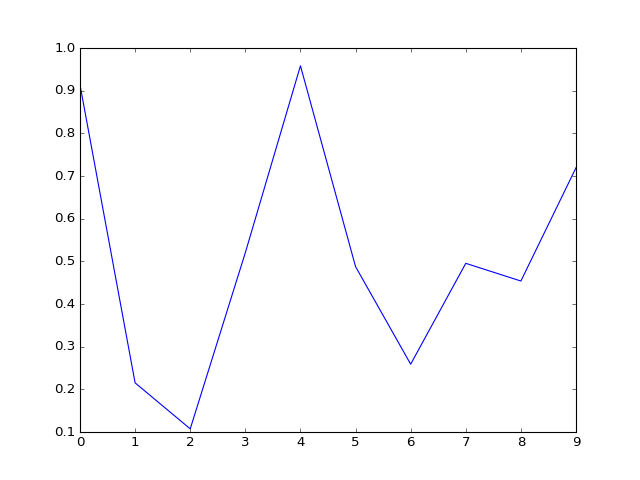

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipywidgets/widgets/widget.py:513: DeprecationWarning: on_trait_change is deprecated: use observe instead
  self.on_trait_change(_validate_border, ['border_width', 'border_style', 'border_color'])


In [5]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
%pylab notebook
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

w = widgets.HTML()

def onclick(event):
    w.value = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
              event.button, event.x, event.y, event.xdata, event.ydata)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)